In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.seasonal as seasonal

# Project Title : Exploring Renewable Energy trends in Africa

# Project Description:

# 1. Introduction 

- Understanding the utilization of renewable energy sources is vital in shaping the energy landscape of Africa. This project aims to provide a comprehensive analysis of the adoption and growth of renewable energy technologies in African countries, with a specific focus on the years from 2010 to  2021. The objective is to offer valuable insights for policymakers, businesses, and researchers by exploring the evolution of renewable energy usage over time, uncovering regional disparities, and identifying the factors influencing the adoption of renewable energy sources. This analysis seeks to shed light on the progress, challenges, and opportunities in the transition towards sustainable and clean energy solutions in the African continent.

# Scope of the project

- This project aims to analyze renewable energy trends in African countries from 2010 to 2021, offering insights for policymakers, businesses, and researchers. The analysis will assess regional disparities, the influence of various renewable energy technologies on industries, and provide data-driven guidance for policy formulation and business decisions.The project also contributes to the academic understanding of renewable energy adoption in Africa and addresses challenges and opportunities in the sustainable energy transition.

#### Dataset
- The dataset provides information on renewable energy production across African countries, categorized by energy source, country, and year. It comprises three main features: 'Country,' 'Energy Source,' and 'Year,'   with corresponding values indicating the renewable energy production (in billion kWh) for each combination. This dataset enables analysis of the evolution of renewable energy adoption in Africa, examining trends across countries and over time, and provides insights into the distribution of renewable energy sources across the continent.

#### Attribute Information
- Country: The specific African country for which the renewable energy data is recorded. This feature specifies the geographical location context for renewable energy production.

- Year: The year in which the renewable energy data was collected. This temporal attribute allows for time-based analysis to identify trends and changes in renewable energy production over different years.

- Energy Source: The type of renewable energy source, such as solar, wind, hydroelectricity, geothermal, biomass, and others. This feature categorizes the data by the specific renewable energy technology.

- Energy Production (billion kWh): The numeric attribute representing the amount of renewable energy production in billion kilowatt-hours (kWh) for the given country, year, and energy source. This attribute quantifies the level of renewable energy generation within the specified context.




#### Data preparation and validation
- Data collection : US Energy Information Administration

- Data Cleaning and manipulation : Excel

- Analysis tools : Python  

#### Exploratory Data Analysis (EDA):

Conduct exploratory data analysis to gain a preliminary understanding of the dataset.
Create summary statistics, data visualizations, and descriptive reports.
Identify trends, patterns, and potential areas of interest.

Let's now load the dataset. As we can see above, the variables:

- Country
- Energy source
- Year
- Energy production


 US Energy Information Administration Dataset Renewable Energy Africa

In [6]:
# Load dataset and display dataset

Renewable_energy_AfricaPy = pd.read_csv('C:/Users/ibrah/OneDrive/Desktop/Data Analytics Certificate Program/Renewable_energy_AfricaPy.csv')
print(Renewable_energy_AfricaPy)

      Country         Energy Source (billion kWh)   1980   1981   1982   1983  \
0     Algeria                   Hydroelectricity   0.248  0.362  0.474  0.233   
1     Algeria                          Geothermal      0      0      0      0   
2     Algeria                      Tide and wave       0      0      0      0   
3     Algeria                              Solar       0      0      0      0   
4     Algeria                               Wind       0      0      0      0   
..        ...                                 ...    ...    ...    ...    ...   
358  Zimbabwe                          Geothermal      0      0      0      0   
359  Zimbabwe                      Tide and wave       0      0      0      0   
360  Zimbabwe                              Solar       0      0      0      0   
361  Zimbabwe                               Wind       0      0      0      0   
362  Zimbabwe                  Biomass and waste       0      0      0      0   

      1984   1985   1986   

In [7]:
# List the names of the columns you want to drop
columns_to_drop = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', 
                   '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
                   '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']

# Use the .drop() method to remove the specified columns
Renewable_energy_AfricaPy.drop(columns=columns_to_drop, inplace=True)

# Print the updated DataFrame
print(Renewable_energy_AfricaPy)

      Country         Energy Source (billion kWh)    2010    2011   2012  \
0     Algeria                   Hydroelectricity    0.172   0.497  0.616   
1     Algeria                          Geothermal       0       0  0.000   
2     Algeria                      Tide and wave        0       0  0.000   
3     Algeria                              Solar   0.0001  0.0001  0.000   
4     Algeria                               Wind        0       0  0.000   
..        ...                                 ...     ...     ...    ...   
358  Zimbabwe                          Geothermal       0       0  0.000   
359  Zimbabwe                      Tide and wave        0       0  0.000   
360  Zimbabwe                              Solar        0  0.0004  0.002   
361  Zimbabwe                               Wind        0       0  0.000   
362  Zimbabwe                  Biomass and waste    0.094   0.131  0.168   

      2013   2014   2015     2016     2017     2018   2019   2020      2021  
0    0.32

### Descriptive analysis (Summary Statistics and total energy production)

In [8]:
# Define the year columns (assuming columns '2010' to '2021' represent the years)
year_columns = [str(year) for year in range(2010, 2022)]

In [9]:
# Ensure that the year columns are numeric and have no non-numeric values
Renewable_energy_AfricaPy[year_columns] = Renewable_energy_AfricaPy[year_columns].apply(pd.to_numeric, errors='coerce')

In [10]:
# Calculate the mean, median, and standard deviation for each year
summary_stats = Renewable_energy_AfricaPy[year_columns].agg(['mean', 'median', 'std'])

In [11]:
# Print the summary statistics
print(summary_stats)

           2010      2011      2012      2013      2014      2015      2016  \
mean    0.37172  0.375956  0.372662  0.394493  0.426182  0.436902  0.447039   
median  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
std     1.64623  1.677133  1.654341  1.718082  1.829047  1.822078  1.788664   

            2017      2018      2019      2020      2021  
mean    0.477982  0.525763  0.559041  0.578675  0.608410  
median  0.000000  0.000000  0.000000  0.000000  0.000000  
std     1.864570  1.991145  2.066483  2.125951  2.255443  


#### Summary statistics
- Mean (average): This statistic calculates the average renewable energy production for each year. It provides a measure of the central tendency of the data. For example, in 2010, the mean production was approximately 0.371 billion kWh, while in 2021, it increased to around 0.620 billion kWh. The mean helps identify the typical production level for each year.

- Median: The median represents the middle value in a sorted list of the production values. It's another measure of central tendency. In this case, the median is consistently 0.000 billion kWh for all years. This suggests that there are likely many zero values or extremely low production values in the dataset, which pull down the median.

- Standard Deviation (std): The standard deviation measures the dispersion or variability in the data. A higher standard deviation indicates greater variability. For each year, the standard deviation represents how much the production values deviate from the mean. In general, as the years progress, the standard deviation increases, indicating more variability in renewable energy production. This could be due to a wider range of production values or more fluctuation in production over time.

### Total Energy Production for Each Country

In [12]:
# Determine the total energy production for each country across 2010 to 2021
Renewable_energy_AfricaPy["Total Energy Production"] = Renewable_energy_AfricaPy[year_columns].sum(axis=1)
print("\nTotal Energy Production for Each Country:")
total_energy_by_country = Renewable_energy_AfricaPy.groupby("Country")["Total Energy Production"].sum()
print(total_energy_by_country)


Total Energy Production for Each Country:
Country
Algeria                       6.298150
Angola                       84.994271
Benin                         0.057280
Botswana                      0.043000
Burkina Faso                  1.841228
Burundi                       2.093264
Cabo Verde                    0.834000
Cameroon                     56.012360
Central African Republic      1.823800
Chad                          0.149100
Comoros                       0.022200
Congo-Brazzaville            11.232708
Congo-Kinshasa              111.643768
Cote d'Ivoire                26.599620
Djibouti                      0.007220
Egypt                       206.005008
Equatorial Guinea             3.962060
Eritrea                       0.105000
Eswatini                      4.843772
Ethiopia                    129.802110
Gabon                        11.122336
Gambia, The                   0.037900
Ghana                        84.020600
Guinea                       12.117617
Guinea-Bissau

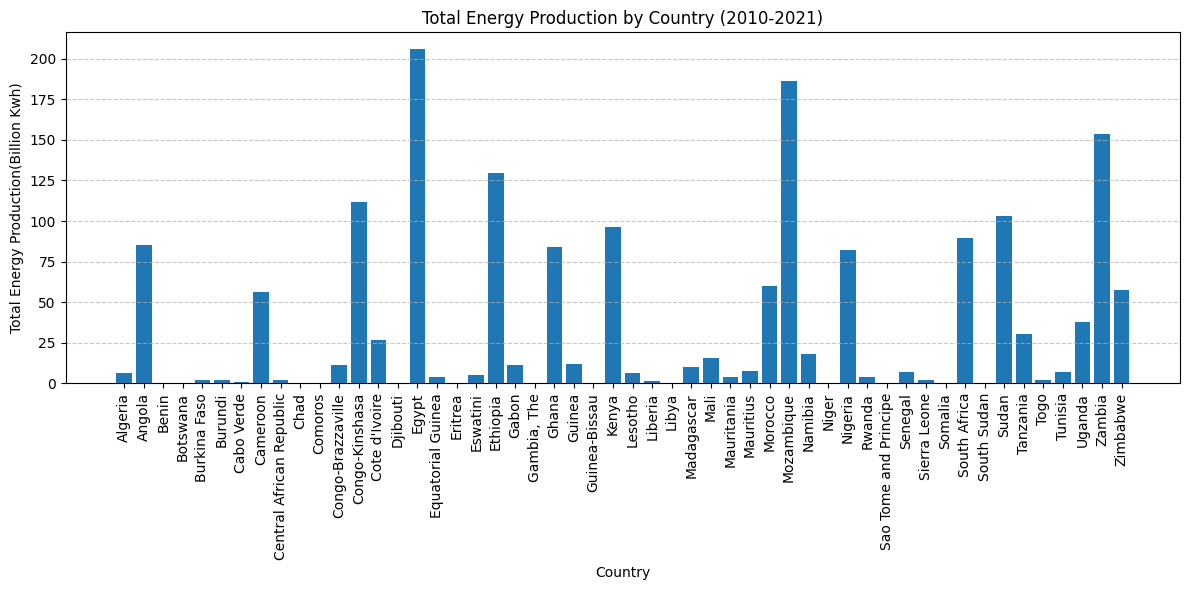

In [13]:
# Plot the total energy production for each country
plt.figure(figsize=(12, 6))
plt.bar(total_energy_by_country.index, total_energy_by_country.values)
plt.title('Total Energy Production by Country (2010-2021)')
plt.xlabel('Country')
plt.ylabel('Total Energy Production(Billion Kwh)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

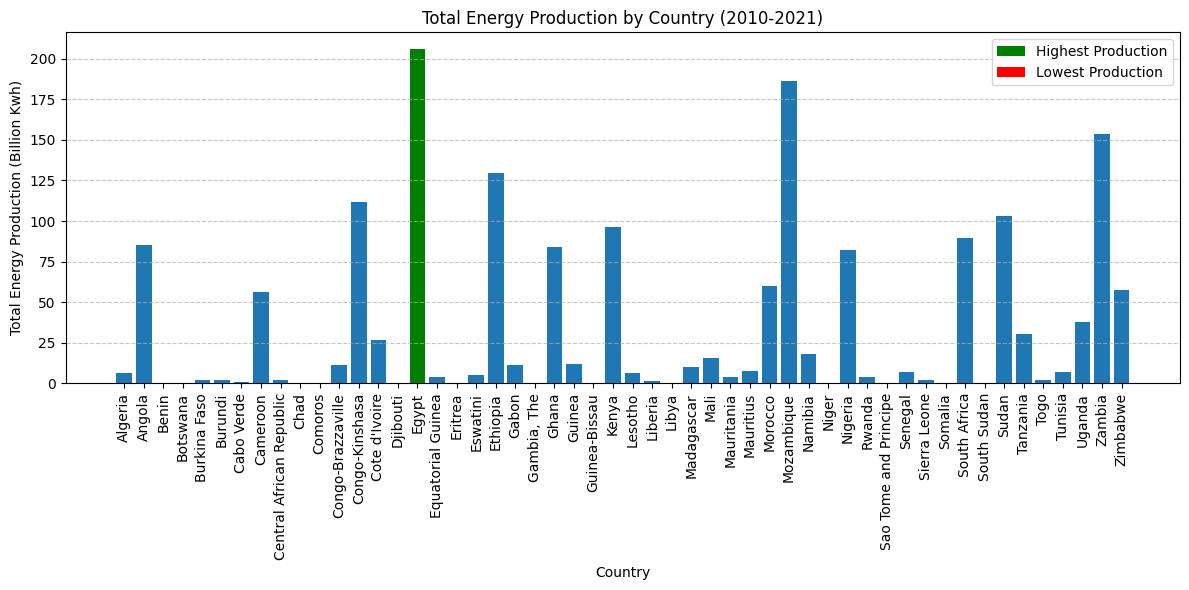

In [14]:

# Find the highest and lowest production countries
highest_production_country = total_energy_by_country.idxmax()
lowest_production_country = total_energy_by_country.idxmin()

# Plot the total energy production for each country
plt.figure(figsize=(12, 6))
plt.bar(total_energy_by_country.index, total_energy_by_country.values)
plt.title('Total Energy Production by Country (2010-2021)')
plt.xlabel('Country')
plt.ylabel('Total Energy Production (Billion Kwh)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the highest and lowest production countries with different colors
plt.bar(highest_production_country, total_energy_by_country[highest_production_country], color='green', label='Highest Production')
plt.bar(lowest_production_country, total_energy_by_country[lowest_production_country], color='red', label='Lowest Production')

# Add a legend to the plot
plt.legend()

plt.tight_layout()

# Show the plot
plt.show()


### Time series Analysis

In [15]:
# Create a time series for the x-axis
years = total_production.index
x = np.arange(len(years))

# Smooth the data to create a wave-like pattern (you can adjust the smoothing factor)
smoothed_production = total_production.rolling(window=3, center=True).mean()

# Create the wave chart
plt.figure(figsize=(12, 6))
plt.plot(x, smoothed_production, marker='o', linestyle='-', color='b', label='Total Energy Production')

# Customize the plot with wave-like patterns
plt.fill_between(x, smoothed_production, alpha=0.2, color='b')
plt.xlabel('Year')
plt.ylabel('Total Energy Production (Billion kWh)')
plt.title('Total Energy Production Over the Years (2010-2021) - Wave Chart')
plt.grid(True)

# Show the plot
plt.show()


NameError: name 'total_production' is not defined

In [16]:
# Sum the energy production across all years for each country
total_production_by_country = Renewable_energy_AfricaPy.groupby('Country').sum(numeric_only=True)

# Find the country with the highest total production
highest_production_country = total_production_by_country.idxmax()

# Find the country with the lowest total production
lowest_production_country = total_production_by_country.idxmin()

print("Country with the Highest Production:", highest_production_country)
print("Country with the Lowest Production:", lowest_production_country)


Country with the Highest Production: 2010                       Mozambique
2011                       Mozambique
2012                       Mozambique
2013                            Egypt
2014                       Mozambique
2015                       Mozambique
2016                            Egypt
2017                            Egypt
2018                            Egypt
2019                            Egypt
2020                            Egypt
2021                            Egypt
Total Energy Production         Egypt
dtype: object
Country with the Lowest Production: 2010                            Botswana
2011                            Botswana
2012                       Guinea-Bissau
2013                       Guinea-Bissau
2014                             Liberia
2015                             Liberia
2016                             Liberia
2017                             Comoros
2018                             Comoros
2019                             Comoros
2020     

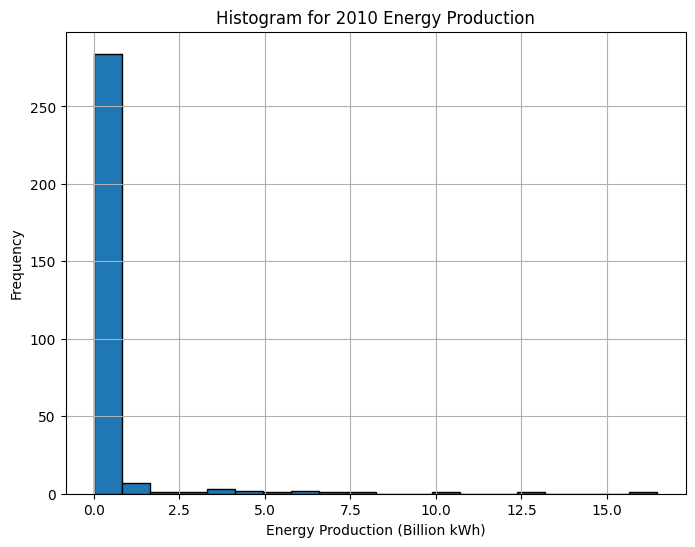

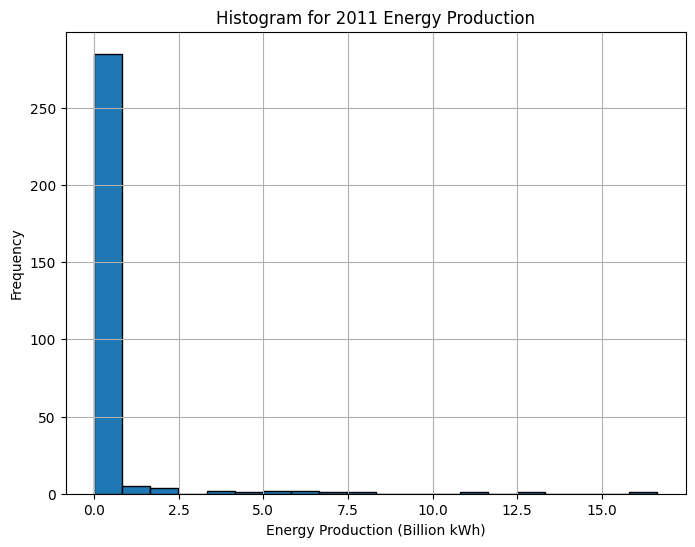

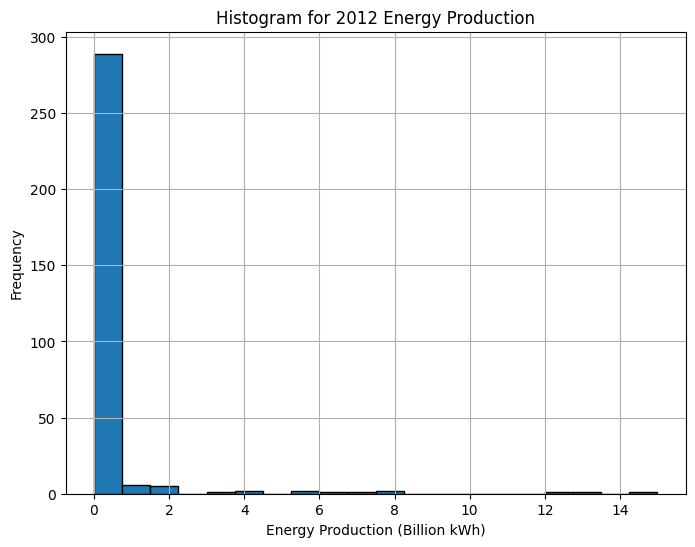

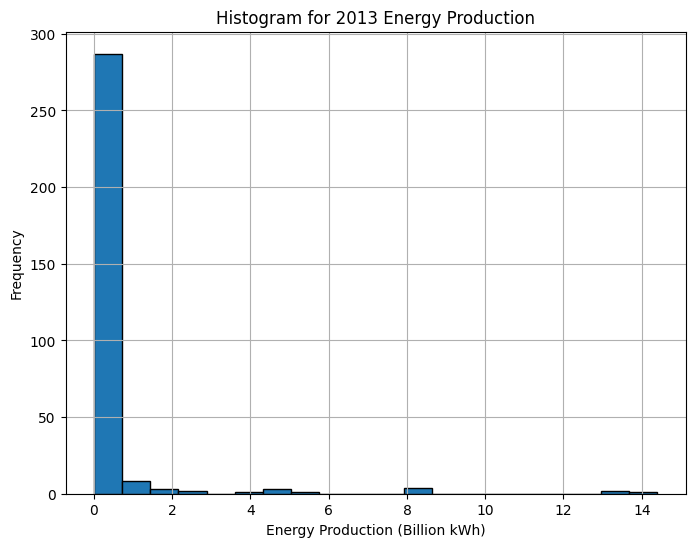

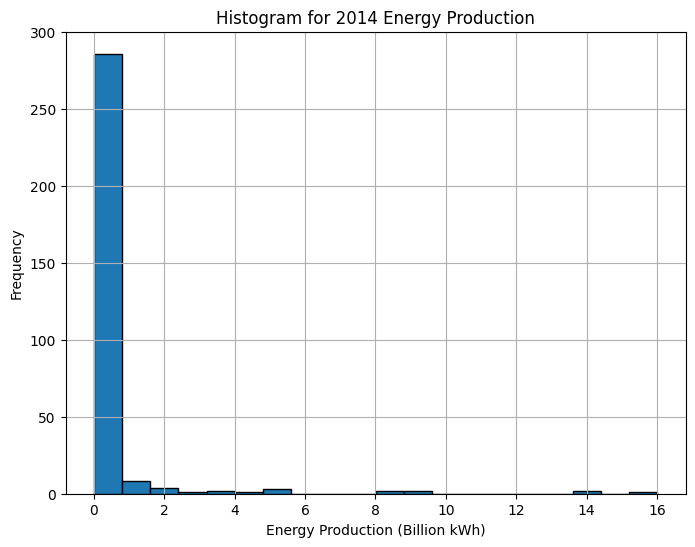

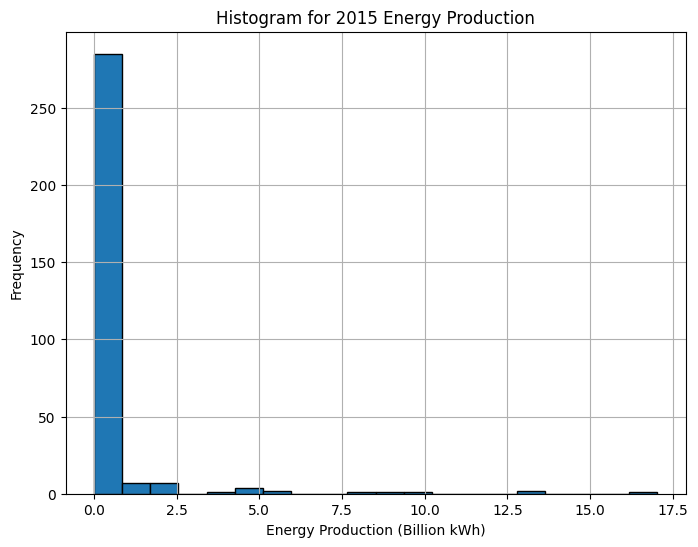

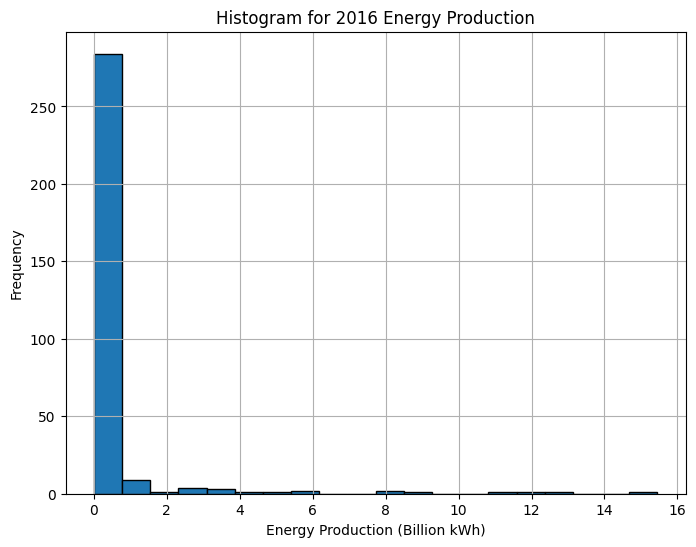

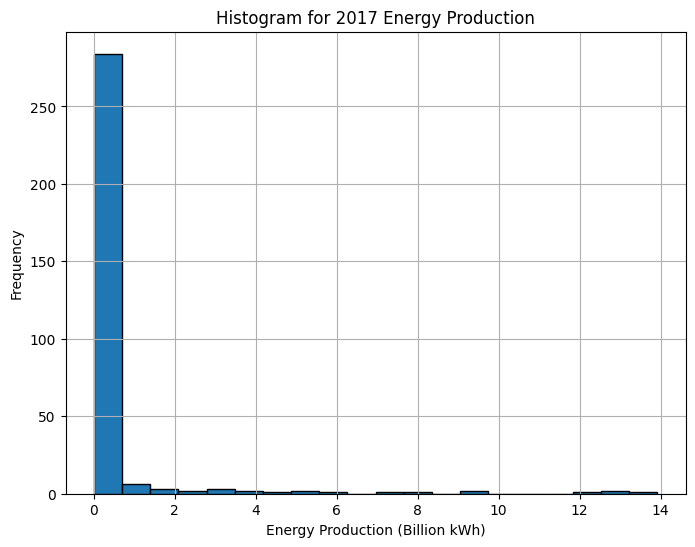

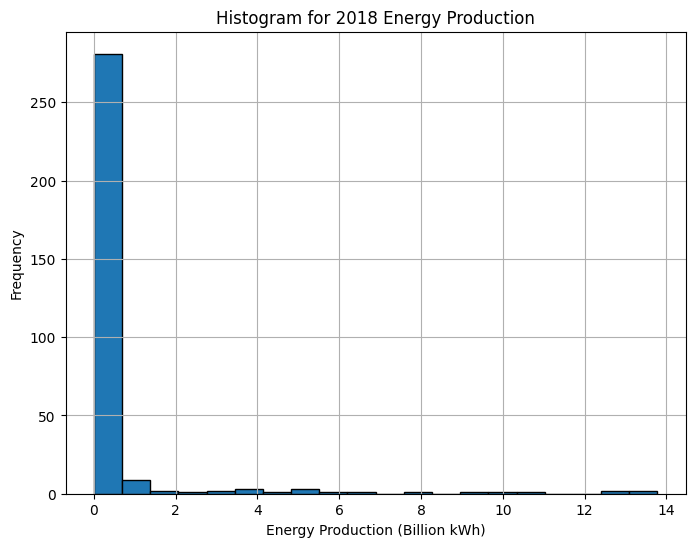

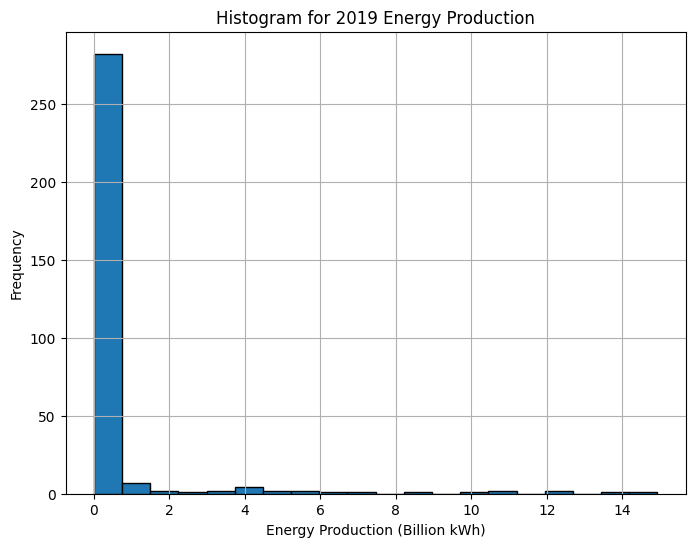

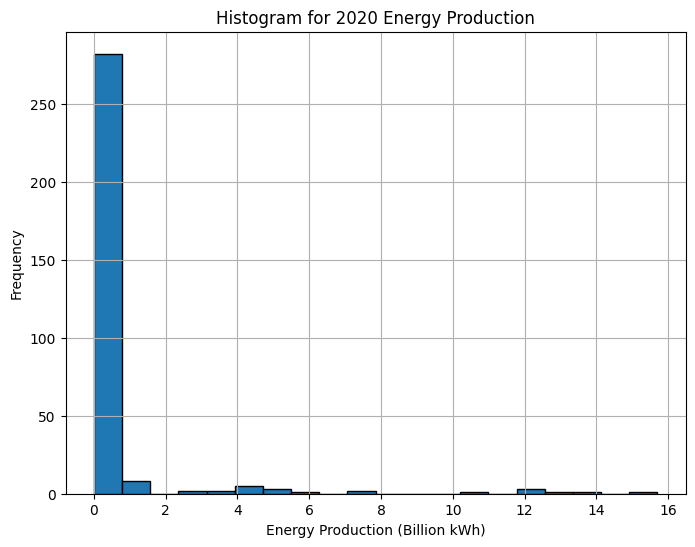

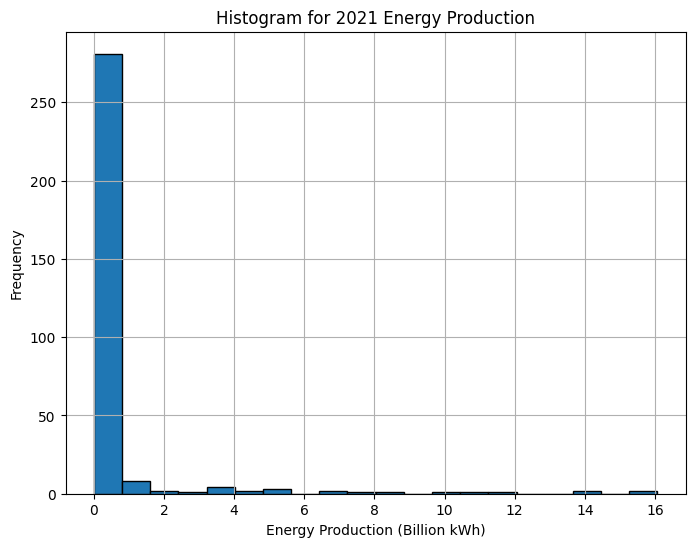

In [17]:
# Select only the columns with the year values
year_columns = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Create histograms for each year
for year in year_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(Renewable_energy_AfricaPy[year], bins=20, edgecolor='k')
    plt.title(f'Histogram for {year} Energy Production')
    plt.xlabel('Energy Production (Billion kWh)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [18]:
# Load dataset and display dataset

Renewable_energy_AfricaPy = pd.read_csv('C:/Users/ibrah/OneDrive/Desktop/Data Analytics Certificate Program/Renewable_energy_AfricaPy.csv')
print(Renewable_energy_AfricaPy)

      Country         Energy Source (billion kWh)   1980   1981   1982   1983  \
0     Algeria                   Hydroelectricity   0.248  0.362  0.474  0.233   
1     Algeria                          Geothermal      0      0      0      0   
2     Algeria                      Tide and wave       0      0      0      0   
3     Algeria                              Solar       0      0      0      0   
4     Algeria                               Wind       0      0      0      0   
..        ...                                 ...    ...    ...    ...    ...   
358  Zimbabwe                          Geothermal      0      0      0      0   
359  Zimbabwe                      Tide and wave       0      0      0      0   
360  Zimbabwe                              Solar       0      0      0      0   
361  Zimbabwe                               Wind       0      0      0      0   
362  Zimbabwe                  Biomass and waste       0      0      0      0   

      1984   1985   1986   

### Total Energy Production by Country and Year:

In [19]:
# Total Energy Production by Country and Year:
total_energy_by_country_year = Renewable_energy_AfricaPy.groupby(['Country']).sum(numeric_only=True) 
# Display the result
print(total_energy_by_country_year)

                              2012       2013       2014       2015  \
Country                                                               
Algeria                    0.61600   0.327000   0.251000   0.221000   
Angola                     3.74800   4.734000   5.044000   5.097000   
Benin                      0.00100   0.002000   0.002000   0.006000   
Botswana                   0.00100   0.002000   0.003000   0.003000   
Burkina Faso               0.10600   0.116000   0.101000   0.106000   
Burundi                    0.14700   0.148000   0.150000   0.147000   
Cabo Verde                 0.07100   0.083000   0.090000   0.085000   
Cameroon                   4.21744   4.334270   4.337270   4.325410   
Central African Republic   0.14940   0.137400   0.168400   0.168400   
Chad                       0.00900   0.009100   0.009100   0.009300   
Comoros                    0.00300   0.002000   0.002000   0.002000   
Congo-Brazzaville          0.97710   0.961300   0.942300   1.088000   
Congo-

### Average Energy Production by Energy Source:

In [126]:
# Average Energy Production by Energy Source:
average_energy_by_source = Renewable_energy_AfricaPy.groupby(['Energy Source (billion kWh)'])[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].mean()
# Display result 
print(average_energy_by_source)

                                        2012      2013      2014      2015  \
Energy Source (billion kWh)                                                  
                    Solar           0.010323  0.010360  0.034900  0.061356   
                    Tide and wave   0.000000  0.000000  0.000000  0.000000   
                Biomass and waste   0.048712  0.050346  0.050889  0.052662   
                Geothermal          0.030519  0.036656  0.061656  0.086175   
                Wind                0.045492  0.067838  0.106819  0.164574   
            Hydroelectricity        2.100928  2.201759  2.302831  2.256648   

                                        2016      2017      2018      2019  \
Energy Source (billion kWh)                                                  
                    Solar           0.092954  0.126026  0.172115  0.261981   
                    Tide and wave   0.000000  0.000000  0.000000  0.000000   
                Biomass and waste   0.055788  0.056762  0.05944

C:\Users\ibrah\AppData\Local\Temp\ipykernel_27272\2680642319.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_energy_by_source = Renewable_energy_AfricaPy.groupby(['Energy Source (billion kWh)'])[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].mean()


### Country with the Highest Total Energy Production:

In [141]:
# Country with the Highest Total Energy Production:
country_highest_total_production = total_energy_by_country.idxmax()
# Display result
print("Country with the Highest Total Energy Production:", country_highest_total_production)


Country with the Highest Total Energy Production: Egypt


### Country with the Highest Energy Production in a Specific Year (e.g., 2021):

In [142]:
# Country with the Highest Energy Production in a Specific Year (e.g., 2021):
country_highest_production_2021 = Renewable_energy_AfricaPy[['Country', '2021']].sort_values(by='2021', ascending=False).iloc[0]['Country']
# Display result
print(country_highest_production_2021)

Zambia


### Energy Sources with the Most Growth:

In [143]:
# Energy Sources with the Most Growth:
energy_growth = Renewable_energy_AfricaPy.groupby(['Energy Source (billion kWh)'])[['2020', '2021']].sum()
energy_growth['Growth'] = energy_growth['2021'] - energy_growth['2020']
most_growth_source = energy_growth['Growth'].idxmax()
# Display result
print(most_growth_source)


            Hydroelectricity 


### Energy Sources with Consistent Production:

In [147]:
# Energy Sources with Consistent Production
consistent_sources = []
for source, data in Renewable_energy_AfricaPy.groupby('Energy Source (billion kWh)'):
    if data['2010'].sum() == data['2021'].sum():
        consistent_sources.append(source)

# Create a comma-separated string for the result
result_string = ", ".join(consistent_sources)

# Display the result
print("Energy Sources with Consistent Production:", result_string)



Energy Sources with Consistent Production: 


### Ranking of Countries by Energy Production (e.g., in 2021):

In [131]:
country_ranking_2021 = Renewable_energy_AfricaPy[['Country', '2021']].sort_values(by='2021', ascending=False)
# Display result
print(country_ranking_2021)

        Country       2021
350      Zambia  16.072683
238  Mozambique  16.000000
133    Ethiopia  14.000000
105       Egypt  14.000000
7        Angola  11.500000
..          ...        ...
328         NaN        NaN
335         NaN        NaN
342         NaN        NaN
349         NaN        NaN
356         NaN        NaN

[363 rows x 2 columns]


### Identify Trends in Energy Production for a Specific Country (e.g., Algeria):

### Calculate Yearly Growth Rates for a Specific Country (e.g., Algeria):